# **DECOMPOSIÇÃO**

Dividiremos a série em tendência, sazonalidade e resíduo, teremos a decomposição. Mas, somando as três teremos a série completa.


### **Concentração de CO2**

Concentração de CO2 na atmosfera em ppm de março de 1958 a dezembro de 2001 -Observatório Mauna Loa, Havaí

In [216]:
# biblioteca 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [217]:

# configuração do tamanho da figura
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 12, 5

In [218]:
#para importar os dados, precisamos colocar a biblioteca stats, para depois extrair os dados do co2
import statsmodels.api as sm

In [219]:
# Importação do Dataset CO2
concentracao = sm.datasets.co2.load_pandas().data
concentracao

,co2
1958-03-29,316.1
1958-04-05,317.3
1958-04-12,317.6
1958-04-19,317.5
1958-04-26,316.4
...,...
2001-12-01,370.3
2001-12-08,370.8
2001-12-15,371.2
2001-12-22,371.3


In [220]:

# coluna da série
# Length: 2284,comprimento, de 2284 valores
# dados de 7 em 7 dias
serie = pd.Series(concentracao['co2'].values, index = concentracao.index)
serie

1958-03-29    316.1
1958-04-05    317.3
1958-04-12    317.6
1958-04-19    317.5
1958-04-26    316.4
              ...  
2001-12-01    370.3
2001-12-08    370.8
2001-12-15    371.2
2001-12-22    371.3
2001-12-29    371.5
Freq: W-SAT, Length: 2284, dtype: float64

plotar a série, que mostra algumas falhas, no início dos dados, ou seja, Missing values

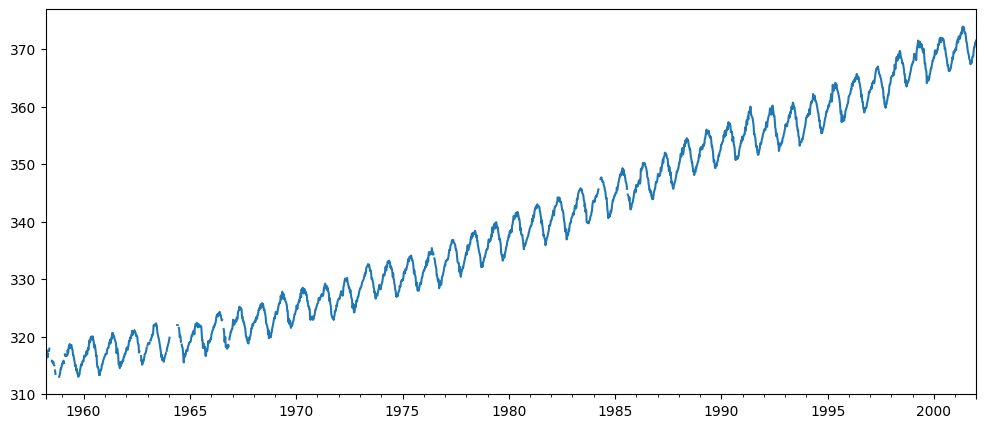

In [221]:
serie.plot();

Teremos que fazer um tratamento de dados para preencher esses valores em branco. Não foi feito a leitura, substituiremos os valores ou pela média ou pela mediana. 

seasonal decompose, é a biblioteca decomposição, para decompor a série

In [222]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [223]:
#decomposicao = seasonal_decompose(serie)

# n]ão vai rodar essa função por conta disso: seasonal decompose, é a biblioteca decomposição, para decompor a série

# não roda com valores faltantes

# pois nossos dados tem quebra de valores 

#### não vai rodar essa função por conta disso: seasonal decompose, é a biblioteca decomposição, para decompor a série

#### não roda com valores faltantes

#### pois nossos dados tem quebra de valores 

# Analisar os valores faltantes 

In [224]:
# Analisar valores missing
concentracao.isnull().sum()
# verificamos quantos valores faltantes há nos nossos dados

co2    59
dtype: int64

optamos por excluir os 59 dados faltantes, lembrando que temos 2284 presentes no total. 


    

In [225]:
print('porcentagem dos dados faltantes na nossa série é de {:.2f} %'.format(59*100/2284).replace('.',','))

porcentagem dos dados faltantes na nossa série é de 2,58 %


### excluir os nossos dados faltantes

In [226]:
# Excluir valores missing
concentracao.dropna(inplace=True) # para deletar direto, utilizando inplace true
# OU
# concentracao = concentracao.dropna()

In [227]:
serie = pd.Series(concentracao['co2'].values, index = concentracao.index)
serie

1958-03-29    316.1
1958-04-05    317.3
1958-04-12    317.6
1958-04-19    317.5
1958-04-26    316.4
              ...  
2001-12-01    370.3
2001-12-08    370.8
2001-12-15    371.2
2001-12-22    371.3
2001-12-29    371.5
Length: 2225, dtype: float64

In [228]:
serie.head()

1958-03-29    316.1
1958-04-05    317.3
1958-04-12    317.6
1958-04-19    317.5
1958-04-26    316.4
dtype: float64

In [229]:
# agora obtivermos 2225 dados
# séries com a sequência

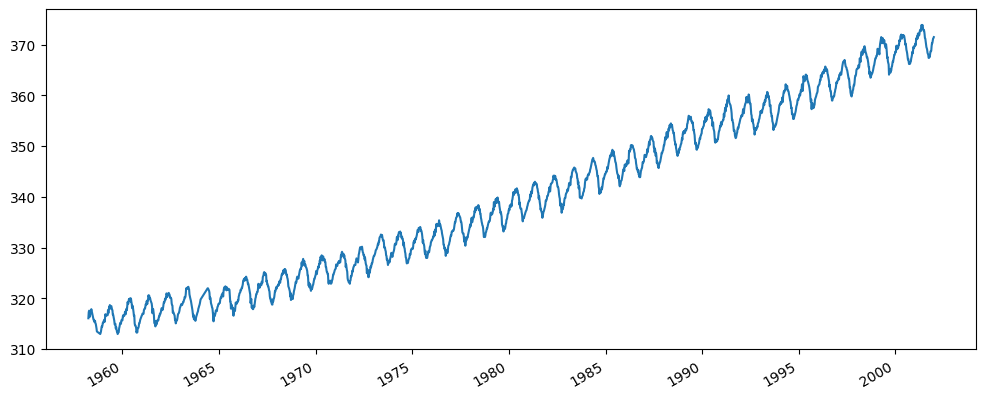

In [230]:
serie.plot();


# decomposição, período 

- nos não colocamos a frequência na nossa série dos dados, como do ano, mês dia, então

- Faremos a frequência, mas vimos que os dados são de 7 a 7 dias, e vamos ver como fica de 7 em 7 dias. Se o freq não der certo, mude para a palavra period=



In [231]:
#decomposicao = seasonal_decompose(serie, freq=7)


In [232]:

decomposicao = seasonal_decompose(serie, period=7)
print(decomposicao)

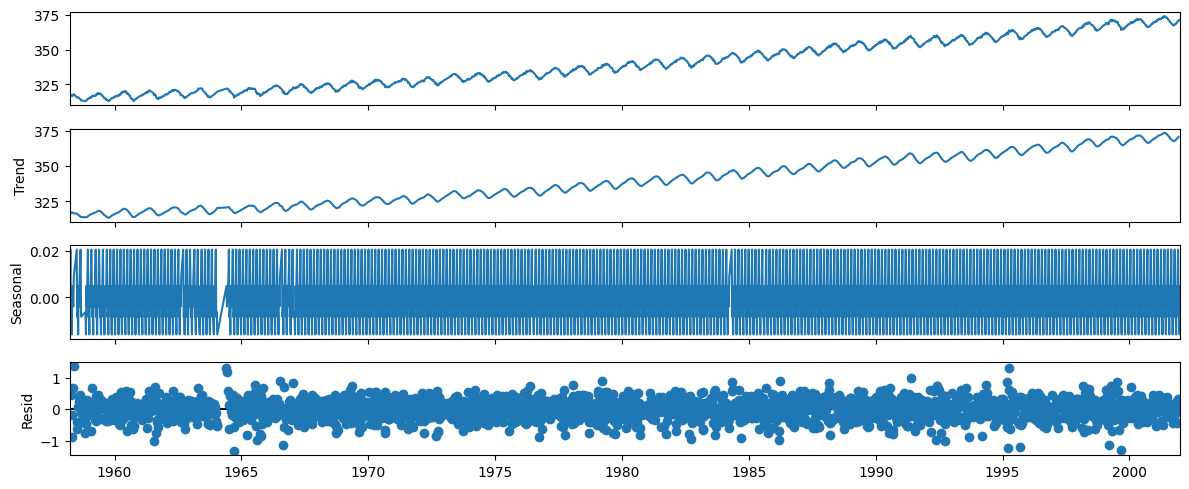

In [233]:
decomposicao.plot();

- série original => observed

- trend=> tendência, há uma ciclicidade em torno da tendência 

- seasonal => sazonalidade, aquelas informações que se repetem ao longo do tempo. Forte sazonalidade

- Residual => série original menos a tendência e a sazonalidade, teremos os resíduos e verificamos os dados não se encaixaram com a sazonalidade e o resíduo. 

Eles nos mostram o desafio para criar o melhor modelo de série tempora com esses resíduos. 


# Os resíduos são importantes para a análise. Perceba a falha na sazonalidade no final do ano de 1964, que são os valores retirados. 

Vamos aumentar a frequência ou o período, para a sazonalidade ficar mais clara. 


Os resíduos começaram a não ficar tão clara como estava anteriormente, para analisar o que fica melhor

In [234]:
decomposicao = seasonal_decompose(serie, period=15)


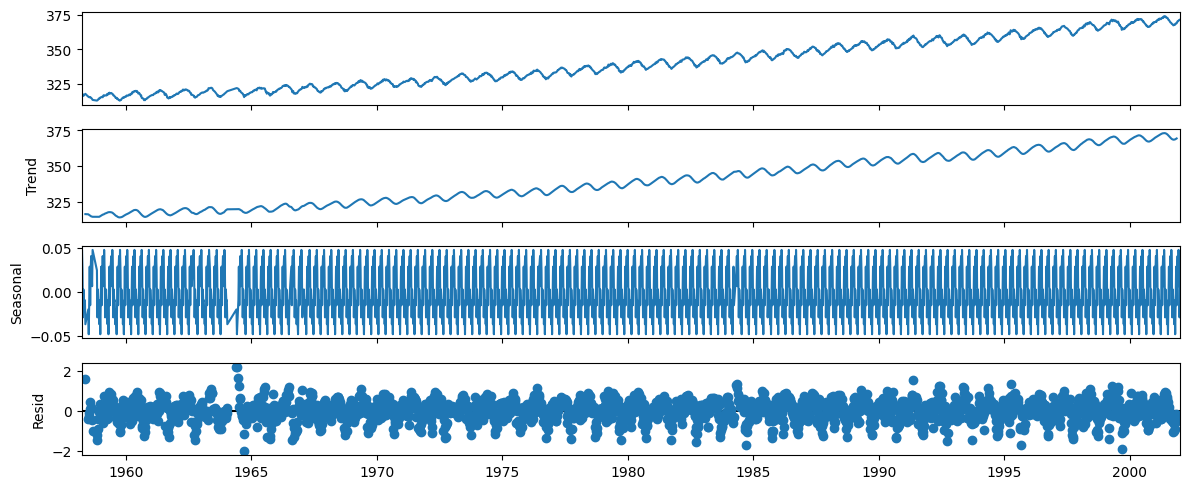

In [235]:
decomposicao.plot();

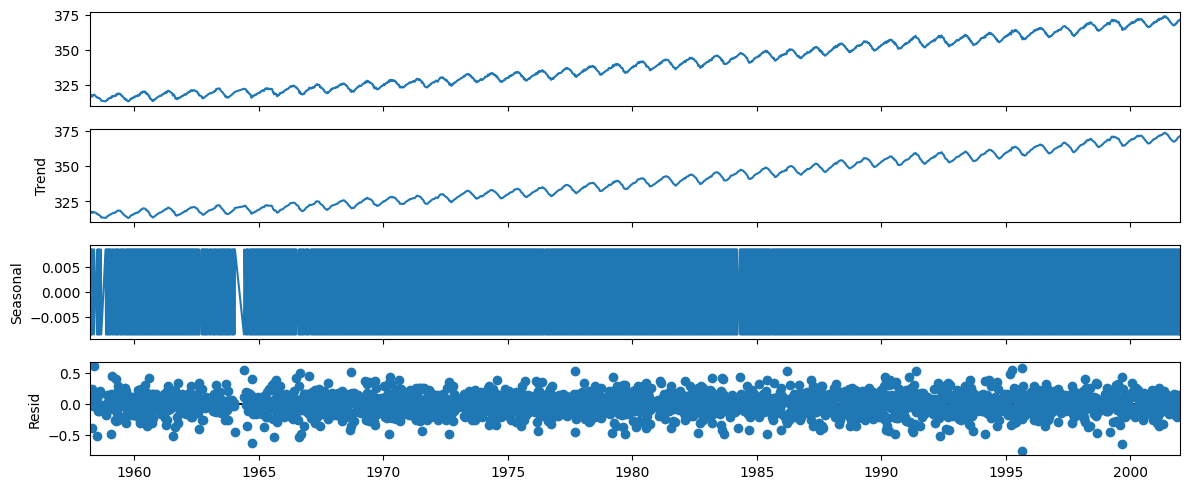

In [236]:
# com a frequência period = 2 , a sazonalidade não fica muito clara
decomposicao = seasonal_decompose(serie, period=2)
decomposicao.plot();

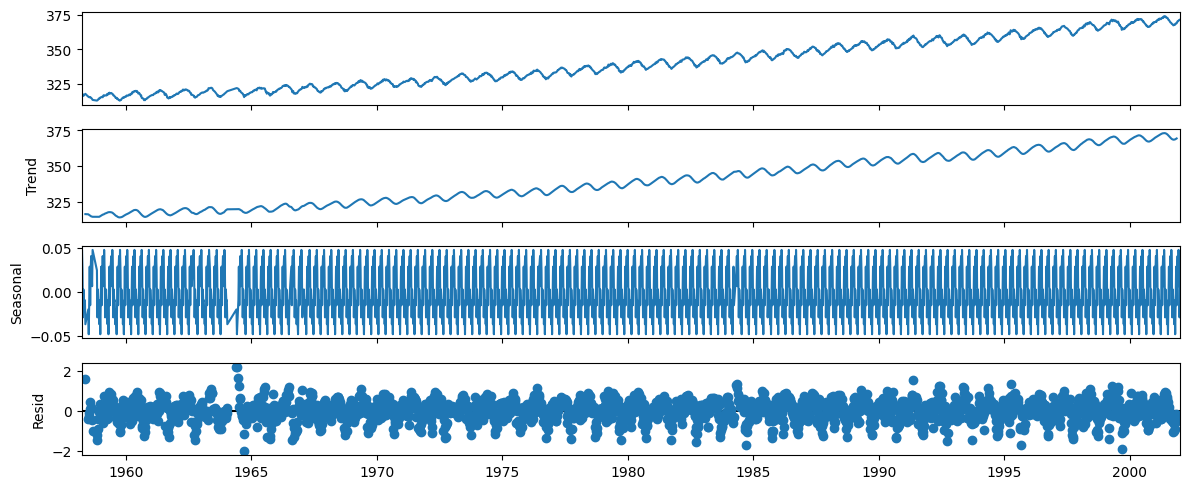

In [237]:
# com a frequência period = 15 , a sazonalidade não fica muito clara
decomposicao = seasonal_decompose(serie, period=15)
decomposicao.plot(); #; para não aparecer mensagens, ou o ideal é fazer o plt.show()

In [238]:
#decomposicao.plot() #; para não aparecer mensagens, ou o ideal é fazer o plt.show()

# melhorara uma melhor resolução do nosso gráfico

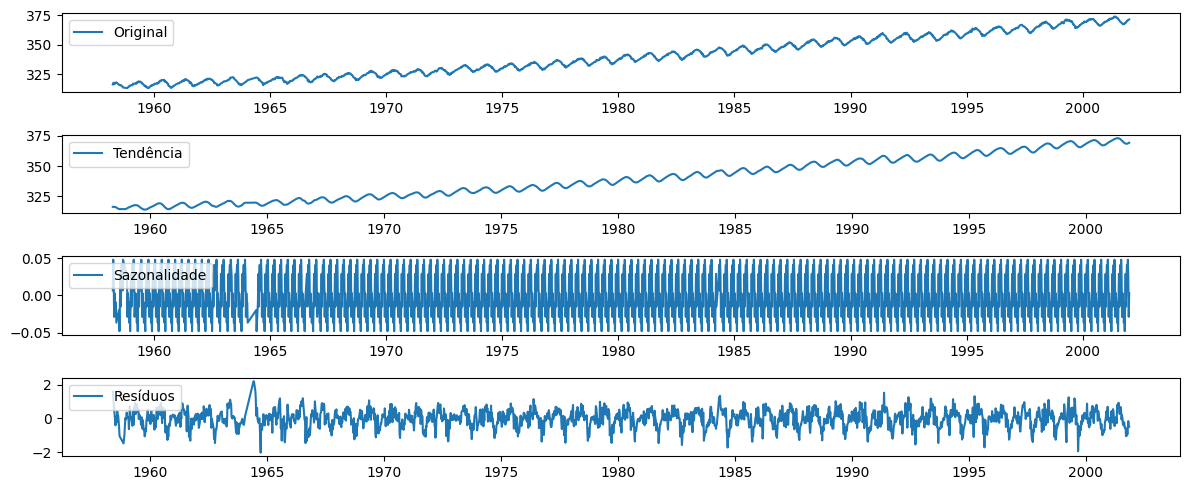

In [239]:
plt.subplot(411)
plt.plot(serie, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(decomposicao.trend, label='Tendência')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(decomposicao.seasonal,label='Sazonalidade')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(decomposicao.resid, label='Resíduos')
plt.legend(loc='best')
plt.tight_layout() #coloca os espaços para colocar as datas, para haver uma melhor visulização.
plt.show()



existe decomposição aditiva e multiplicativa

vamos ver a decomposição multiplicativa, nome da série, frequência freq ou period, e o model = modelo = multiplicativo, se não colocarmos nada fica additive, ou aditivo automático. 


abaixo é outra forma de plotar a decomposição, ou extrair a decomposição     

In [240]:
decomp_mult = seasonal_decompose(serie,period=7,model='multiplicative')

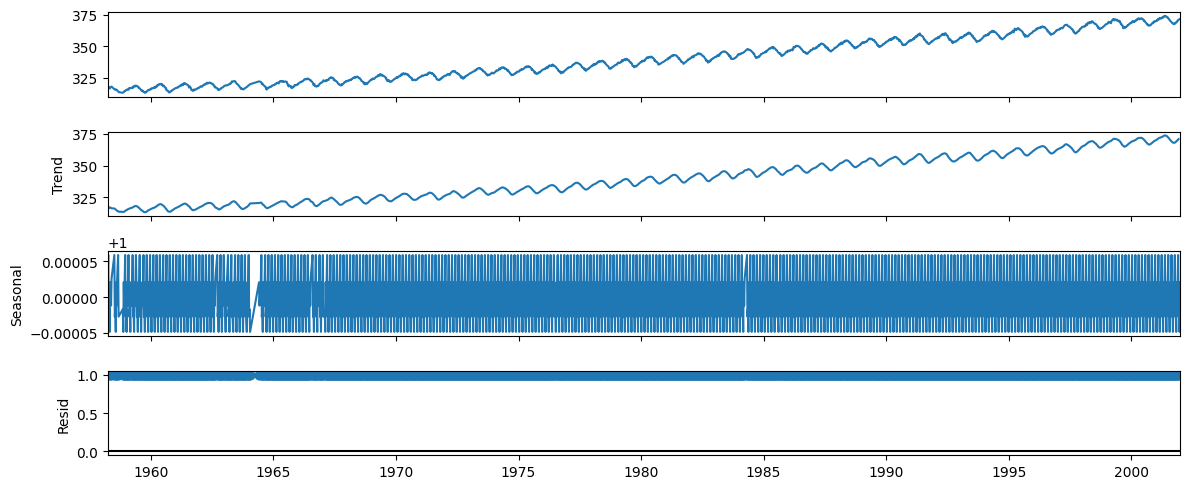

In [241]:
decomp_mult.plot();

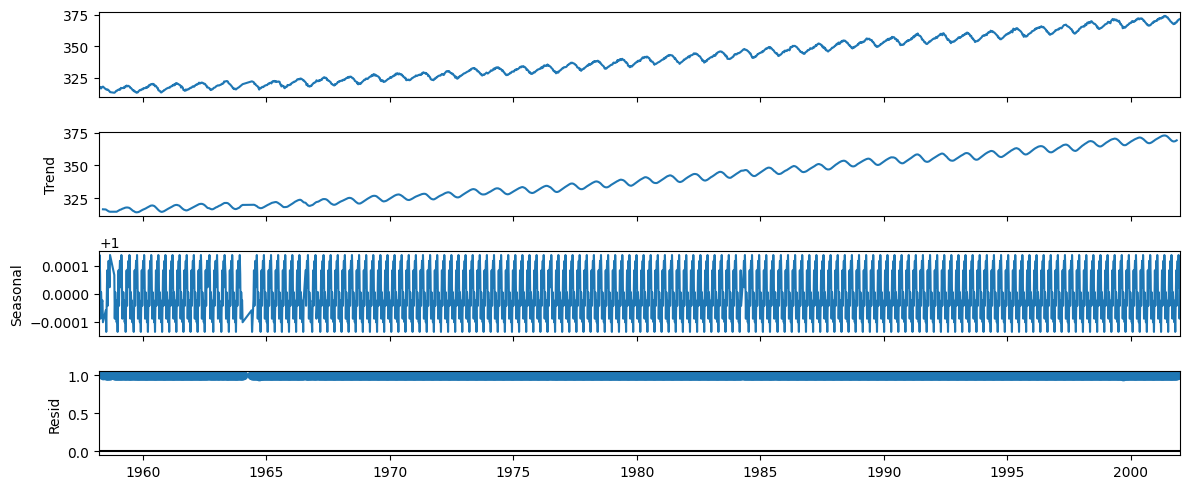

In [242]:
decomp_mult = seasonal_decompose(serie,period=15,model='multiplicative')

decomp_mult.plot();

tendência, sazonalidade, resíduos

# Exemplo 2

### **DECOMPOSIÇÃO MANCHAS SOLARES 1**

**Número médio mensal de manchas solares relativas de 1749 a 1983. Coletados no Observatório Federal Suíço, Zurique até 1960, e depois no Observatório Astronômico de Tóquio..**


In [243]:
manchas_solares = pd.read_csv('sunspots.csv')

In [244]:
manchas_solares

,x
1,58.0
2,62.6
3,70.0
4,55.7
5,85.0
...,...
2816,71.8
2817,50.3
2818,55.8
2819,33.3


Não há datas no nosso arquivo, teremos que colocar as datas dentro da nossa série . 

Pimeiro nomeamos as nossas colunas.

In [245]:
manchas_solares.columns = ['valores']
manchas_solares.head()

,valores
1,58.0
2,62.6
3,70.0
4,55.7
5,85.0


resetar os dados (ou reiniciar), pois tem que começar do 0 e não do 1. 

In [246]:
manchas_solares = manchas_solares.reset_index(drop=True) # drop é para excluir o índice anterior
manchas_solares

,valores
0,58.0
1,62.6
2,70.0
3,55.7
4,85.0
...,...
2815,71.8
2816,50.3
2817,55.8
2818,33.3


criaremos o índice, que começará no ano de 1749, com um períods ou período com o comprimento dos dados, usando len, e utilizar a freq igual ao mês;  

In [247]:
indice = pd.date_range('1749', periods = len(manchas_solares), freq = 'M')
indice

/tmp/ipykernel_16219/3366770196.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  indice = pd.date_range('1749', periods = len(manchas_solares), freq = 'M')


DatetimeIndex(['1749-01-31', '1749-02-28', '1749-03-31', '1749-04-30',
               '1749-05-31', '1749-06-30', '1749-07-31', '1749-08-31',
               '1749-09-30', '1749-10-31',
               ...
               '1983-03-31', '1983-04-30', '1983-05-31', '1983-06-30',
               '1983-07-31', '1983-08-31', '1983-09-30', '1983-10-31',
               '1983-11-30', '1983-12-31'],
              dtype='datetime64[ns]', length=2820, freq='ME')

In [248]:

# colocar as datas dentro da nossa série
serie2 = pd.Series(manchas_solares['valores'].values, index = indice)
serie2.head()

1749-01-31    58.0
1749-02-28    62.6
1749-03-31    70.0
1749-04-30    55.7
1749-05-31    85.0
Freq: ME, dtype: float64

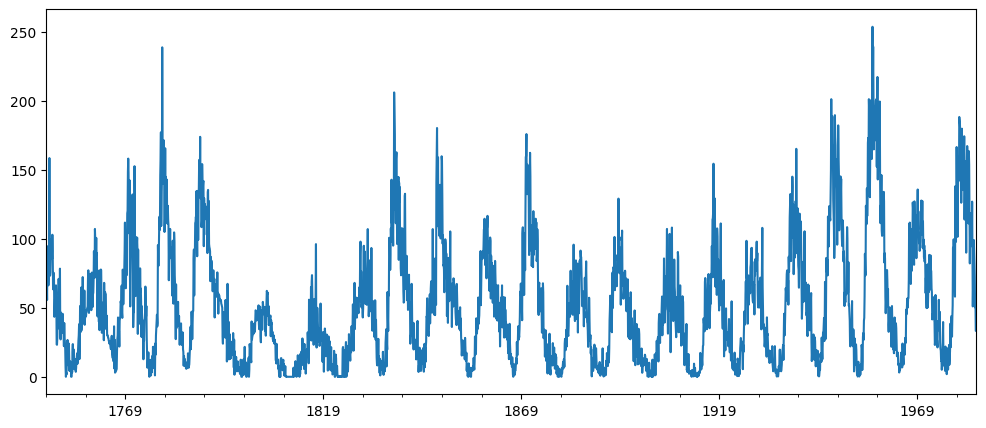

In [249]:
serie2.plot()
plt.show()

####  essas séries de manchas solares e vamos fazer a decomposição da série. 

In [250]:
decomposicao2 = seasonal_decompose(serie2)

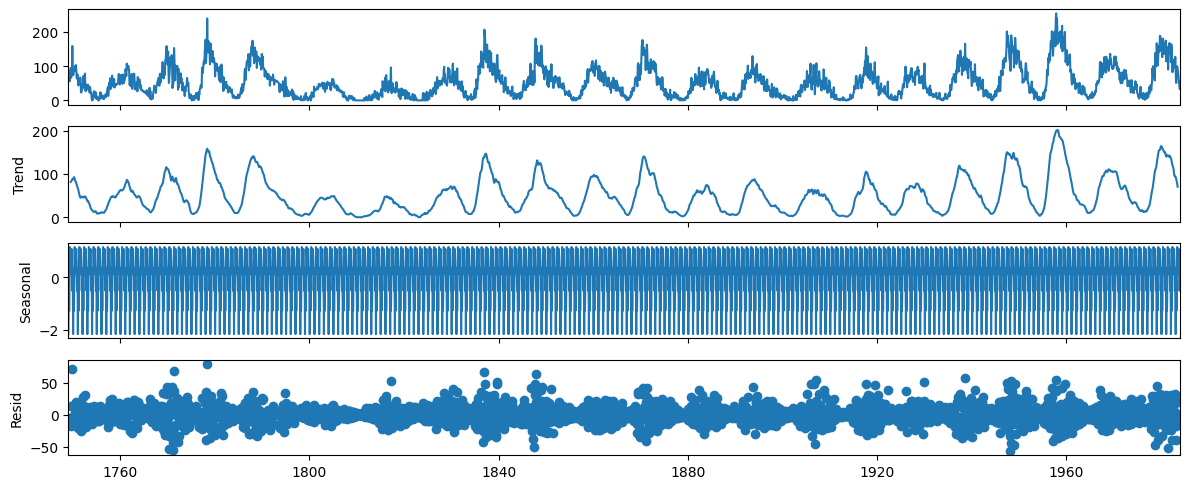

In [251]:
decomposicao2.plot(); #; é para não ter figura duplicada.


- há uma tendência, sem ser crescente ou decrescente, mas existe uma oscilação da tendência. E isso indica que há uma ciclicidade em torno da nossa tendência, 

- uma sazonalidade claríssima, isso ocorre de tempos em tempos bem definidos. 


- resíduos, como estão variando os nossos resíduos. Um dos elementos que vamos aprender futuramente, vamos analisar  

In [252]:
#decom_mult2 = seasonal_decompose(serie2,model='multiplicative')


# ValueError: Multiplicative seasonality is not appropriate for zero and negative values


#quando há valores zero ou negativos o modelo multiplicativo não é adequado, mas sim o aditivo, como padrão. 

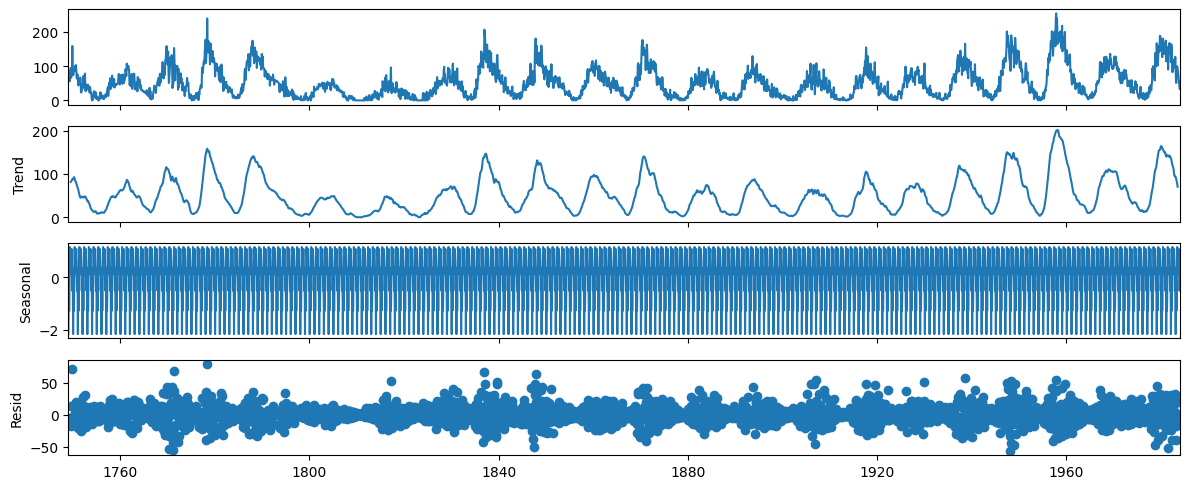

In [253]:
decom_mult2 = seasonal_decompose(serie2,model='adittive')
decom_mult2.plot();

# importaremos os novos dados das manchas solares

### **Decomposição Manchas solares 2**

In [254]:
import statsmodels.api as sm

dados de ano year,  e sun activity ou solar activity

In [255]:
# Importação do Dataset Manchas Solares do Python
manchas_solares = sm.datasets.sunspots.load_pandas().data
manchas_solares

,YEAR,SUNACTIVITY
0,1700.0,5.0
1,1701.0,11.0
2,1702.0,16.0
3,1703.0,23.0
4,1704.0,36.0
...,...,...
304,2004.0,40.4
305,2005.0,29.8
306,2006.0,15.2
307,2007.0,7.5


comparar utilizando o índice

In [256]:
indice = pd.date_range('1700', periods = len(manchas_solares), freq = 'Y')
indice

/tmp/ipykernel_16219/26285622.py:1: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  indice = pd.date_range('1700', periods = len(manchas_solares), freq = 'Y')


DatetimeIndex(['1700-12-31', '1701-12-31', '1702-12-31', '1703-12-31',
               '1704-12-31', '1705-12-31', '1706-12-31', '1707-12-31',
               '1708-12-31', '1709-12-31',
               ...
               '1999-12-31', '2000-12-31', '2001-12-31', '2002-12-31',
               '2003-12-31', '2004-12-31', '2005-12-31', '2006-12-31',
               '2007-12-31', '2008-12-31'],
              dtype='datetime64[ns]', length=309, freq='YE-DEC')

manchas solares anuais, pelo index

In [257]:
serie3 = pd.Series(manchas_solares['SUNACTIVITY'].values, index = manchas_solares['YEAR'])
serie3

YEAR
1700.0     5.0
1701.0    11.0
1702.0    16.0
1703.0    23.0
1704.0    36.0
          ... 
2004.0    40.4
2005.0    29.8
2006.0    15.2
2007.0     7.5
2008.0     2.9
Length: 309, dtype: float64

plotagem da nossa série das manchas solares, ou atividades solares

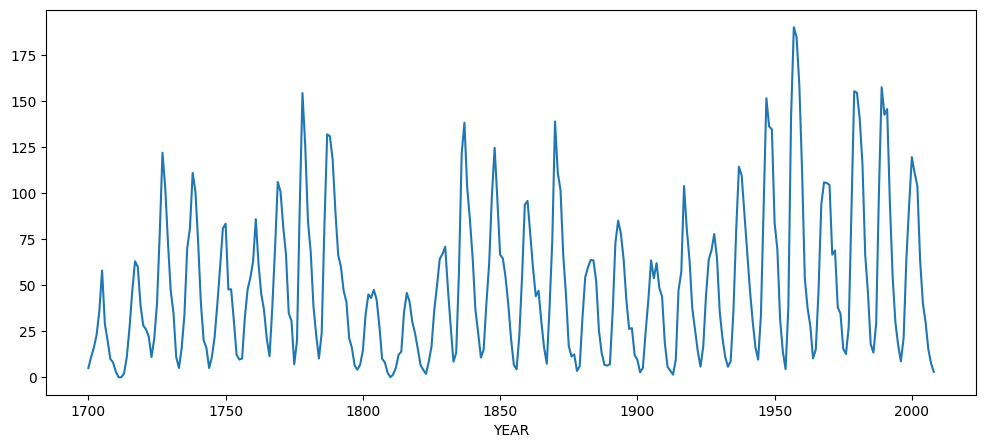

In [258]:
serie3.plot();

decomposição com um período 2

In [259]:
decomposicao3 = seasonal_decompose(serie3, period=2)

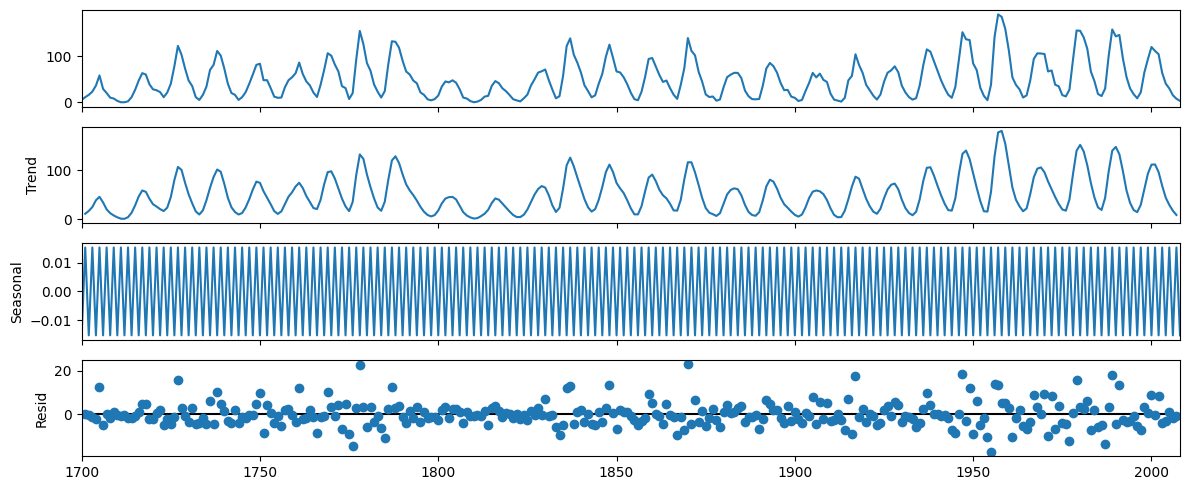

In [260]:
decomposicao3.plot()
plt.show()

tendência com ciclicidade e a tendência segue um pouco a série original. No caso, ou exemplo acima, não é crescente e nem decrescente.

sazonalidade bem determinada, repetição bem determinada

resíduos, o que sobra do dados, tirando a tendência e a sazonalidade. 



## faremos um novo teste, utilizando o índice criado

índice com frequência anual

In [261]:
serie4 = pd.Series(manchas_solares['SUNACTIVITY'].values, index = indice)
serie4

1700-12-31     5.0
1701-12-31    11.0
1702-12-31    16.0
1703-12-31    23.0
1704-12-31    36.0
              ... 
2004-12-31    40.4
2005-12-31    29.8
2006-12-31    15.2
2007-12-31     7.5
2008-12-31     2.9
Freq: YE-DEC, Length: 309, dtype: float64

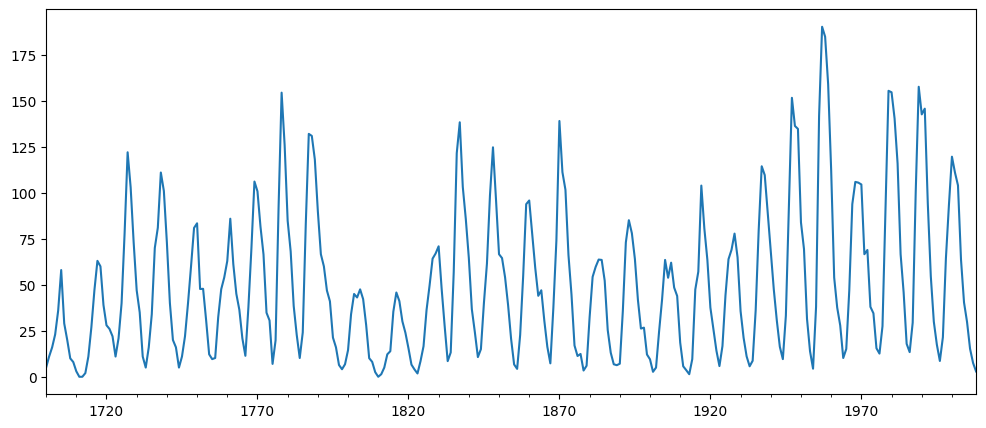

In [262]:
serie4.plot();

se não colocarmos o período, os dados da decomposição ficam errados, temos que tomar cuidados

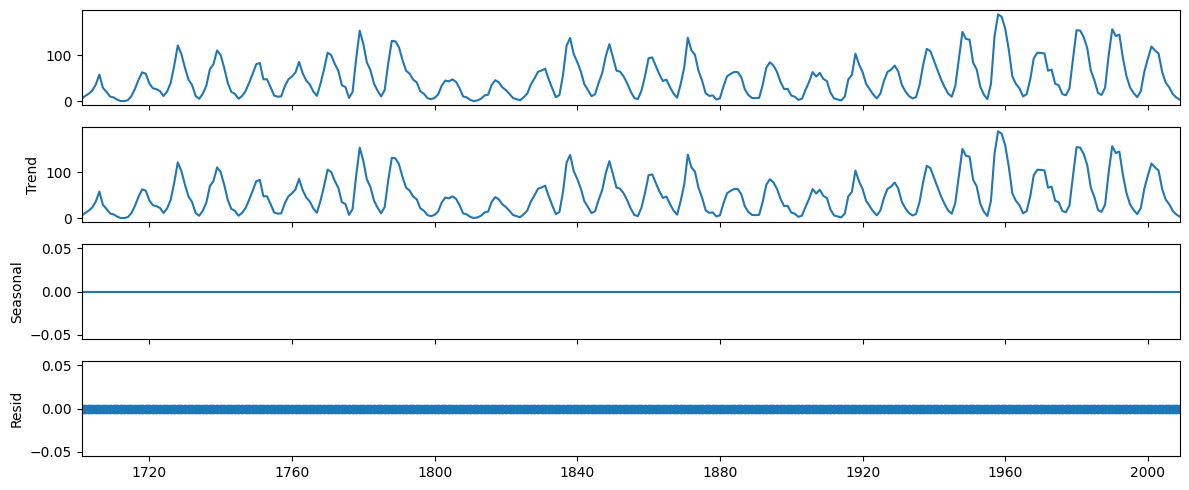

In [263]:
decomposicao4 = seasonal_decompose(serie4) # automáticamente foi escolhido um period=1 que é o dado anual
decomposicao4.plot();
# ou seja a frequência = 1 está batendo com a sazonalidade, que é 1, de 1 em 1 ano. 
# nao é possível utilizar a análise dos valores. 


In [264]:
decomposicao4 = seasonal_decompose(serie4,period=3)

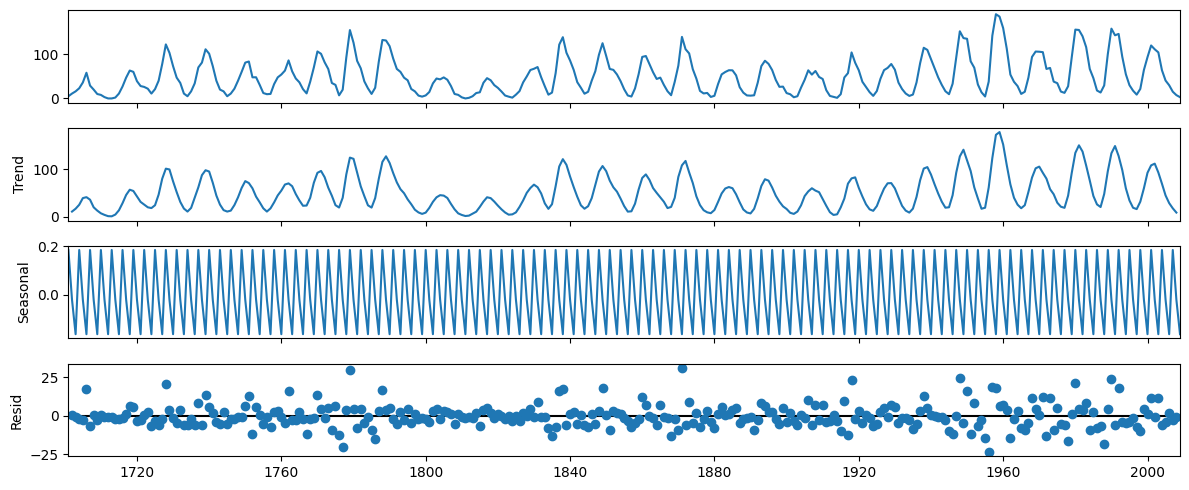

In [265]:
decomposicao4.plot();

existe uma ciclicidade dentro da tendência, e a sazonalidade é bem clara, iguais ou seja uniforme. 